In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, plot_roc_curve


import warnings
warnings.filterwarnings('ignore')

In [70]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] 

In [28]:
data = pd.read_csv("/Users/Yasmine/Desktop/GeekTime/数据分析45讲/项目/credit_fraud/creditcard.csv")

# 1. EDA

In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
data.Class.value_counts(1)

0    0.998273
1    0.001727
Name: Class, dtype: float64

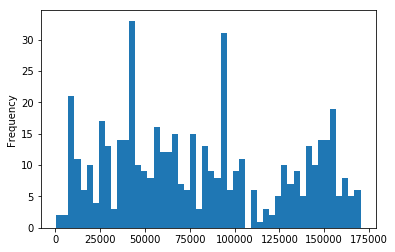

In [19]:
data[data['Class']==1].Time.plot(kind='hist', bins=50)

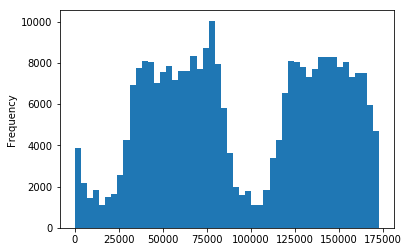

In [20]:
data[data['Class']==0].Time.plot(kind='hist', bins=50)

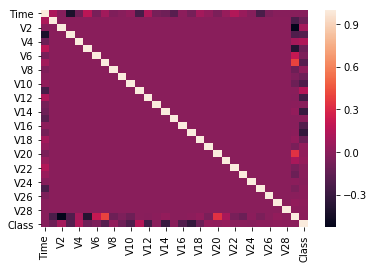

In [23]:
sns.heatmap(data.corr())

# 2. 数据清洗

In [27]:
# 由于其他特征是PCA降维得到的，因此只需要对Amout标准化，并去掉Time和Amout
# 且由于数据中并不知道这些特征具体代表什么含义，姑且都保留
data['Amount_Norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# 3. 建模

In [30]:
X = data.drop('Class', axis=1).values
y = data.Class.values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

## 3.1 Logistic Regression

In [42]:
model_LR = LogisticRegression().fit(X_train, y_train)

In [43]:
predictions =  model_LR.predict(X_test)

In [44]:
print("精确率：{}，召回率：{}，F-score：{}".format(
    precision_score(y_test, predictions), recall_score(y_test, predictions), f1_score(y_test, predictions)))

精确率：0.7815126050420168，召回率：0.6549295774647887，F-score：0.7126436781609194


In [46]:
confusion_matrix(y_test, predictions)

array([[85275,    26],
       [   49,    93]])

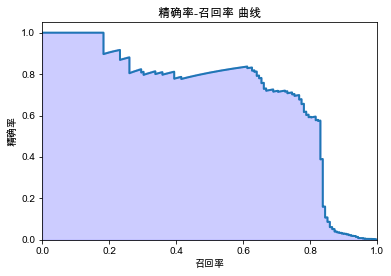

In [96]:
# 打印PR曲线
def print_precision_recall_curve(model, X_test, y_test):
    y_score = model.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('召回率')
    plt.ylabel('精确率')
    plt.title('精确率-召回率 曲线')
    plt.show();

print_precision_recall_curve(model_LR, X_test, y_test)

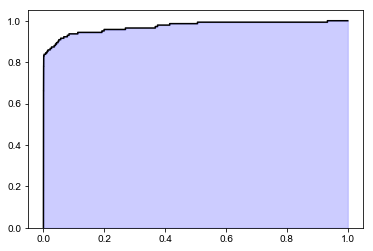

AUC=0.9719


In [97]:
# 打印ROC曲线，计算AUC值
def print_roc_curve_auc(model, X_test, y_test):
    #plot_roc_curve(model, X_test, y_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test), pos_label=1)
    plt.step(fpr, tpr, color = 'k', where = 'post')
    plt.fill_between(fpr, tpr, step ='post', alpha = 0.2, color = 'b')
    plt.ylim([0.0,1.05])
    plt.show()
    print("AUC=%.4lf"%auc(fpr, tpr))
print_roc_curve_auc(model_LR, X_test, y_test)

## 3.2 LinearSVC

In [94]:
model_SVC = LinearSVC().fit(X_train, y_train)
y_predict_svc = model_SVC.predict(X_test)

In [95]:
print("精确率：{}，召回率：{}，F-score：{}".format(
    precision_score(y_test, y_predict_svc), recall_score(y_test, y_predict_svc), f1_score(y_test, y_predict_svc)))

精确率：0.816，召回率：0.7183098591549296，F-score：0.7640449438202247


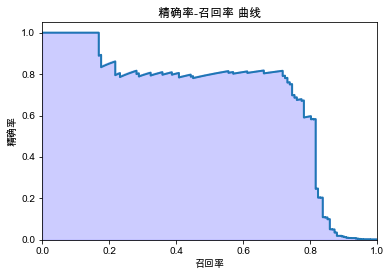

In [98]:
print_precision_recall_curve(model_SVC, X_test, y_test)

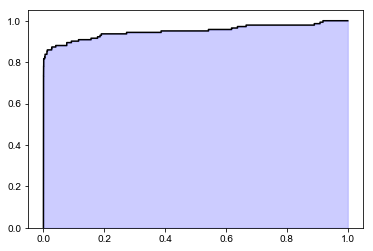

AUC=0.9501


In [99]:
print_roc_curve_auc(model_SVC, X_test, y_test)